#### Задание 1

```
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [ ]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

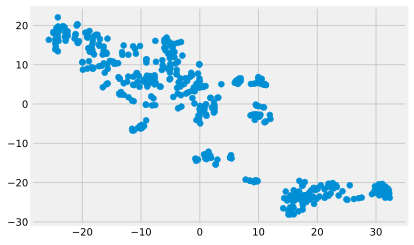

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2

```
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

```

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [ ]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [ ]:
pd.value_counts(labels_train)

0    191
1    128
2     85
dtype: int64

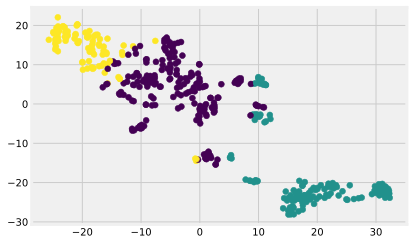

In [ ]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [ ]:
for i in range(3):
    mean_price = y_train[labels_train==i].mean()[0]
    mean_crim = X_train.loc[labels_train==i, 'CRIM'].mean()
    print('Cluster {}: mean_price = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_price = 24.97, mean_crim = 0.42
Cluster 1: mean_price = 16.18, mean_crim = 10.64
Cluster 2: mean_price = 27.87, mean_crim = 0.07


<h4>* Задание 3</h4>

```
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
```

In [ ]:
labels_test = kmeans.predict(X_test_scaled)

In [ ]:
for i in range(3):
    mean_price = y_test[labels_test==i].mean()[0]
    mean_crim = X_test.loc[labels_test==i, 'CRIM'].mean()
    print('Cluster {}: mean_price = {}, mean_crim = {}'.format(i, '%0.2f' % mean_price, '%0.2f' % mean_crim))

Cluster 0: mean_price = 21.86, mean_crim = 0.27
Cluster 1: mean_price = 16.44, mean_crim = 10.17
Cluster 2: mean_price = 31.35, mean_crim = 0.06
